In [1]:
#Normal Equation

In [13]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

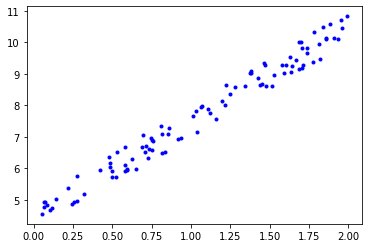

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")

In [15]:
#computing theta^ (theta_best)
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to reach instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta^ = ", theta_best)

theta^ =  [[4.46818305]
 [3.03378889]]


In [16]:
#Since we used 4 + 3*X, it was expected to be 4 and 3, but the result is close enough
#NOw we can use theta_best to make predictions

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46818305],
       [10.53576084]])

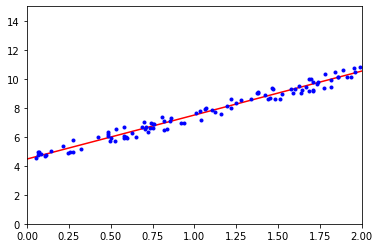

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()